In [1]:
import numpy as np
import matplotlib.pyplot as plt
from training_data.read_data import read_data

In [2]:
X = read_data()
mu = np.mean(X, axis=1)
X_centered = np.zeros_like(X)
for i in range(X.shape[1]):
    X_centered[:, i] = X[:, i] - mu
Z = 1/np.sqrt(X.shape[0] - 1) * X_centered
u, s, vh = np.linalg.svd(Z, full_matrices=False)

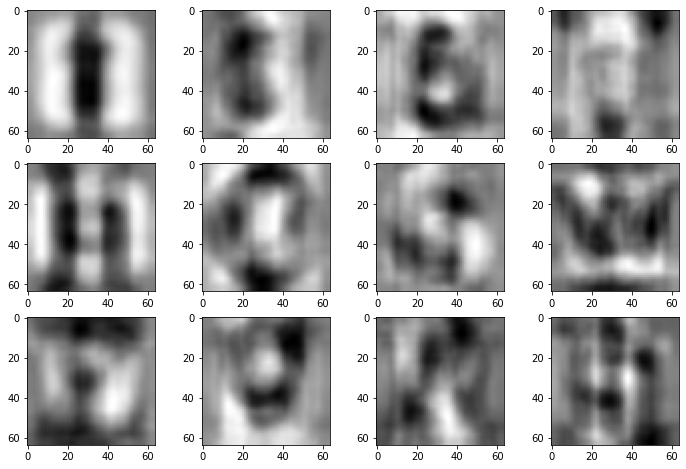

In [17]:
fig, axs = plt.subplots(3,4)
fig.set_figheight(8)
fig.set_figwidth(12)
for i in range(12):
    img = u[:, i]
    img = np.reshape(img, (64,64))
    axs[int(i%3), int(i/3)].imshow(img, cmap=plt.cm.gray)

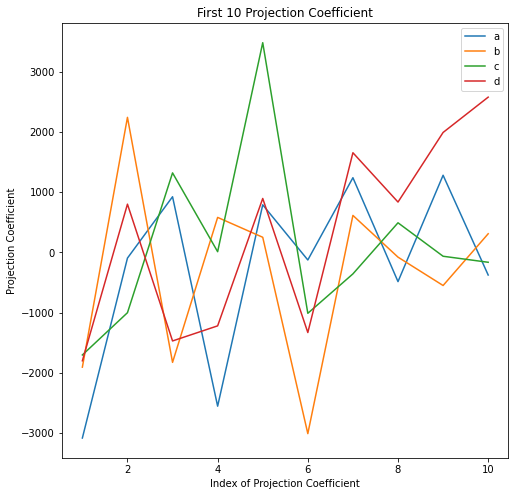

In [5]:
plt.figure(2, figsize=(8,8))
letters = ['a','b','c','d']
for i in range(4):
    Y = np.dot(u.transpose(), X_centered[:,i])
    plt.plot(np.arange(start=1, stop=11, step=1), Y[0:10], label=letters[i])
plt.xlabel('Index of Projection Coefficient')
plt.ylabel('Projection Coefficient')
plt.title("First 10 Projection Coefficient")
plt.legend()

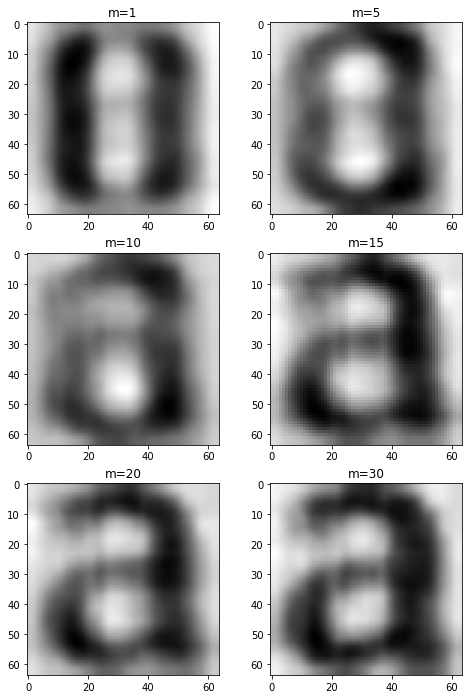

In [16]:
fig,axs = plt.subplots(3,2)
fig.set_figheight(12)
fig.set_figwidth(8)
m = [1,5,10,15,20,30]
for i in range(6):
    Y = np.dot(u[:, 0:m[i]].transpose(), X_centered[:,0])
    X_est = np.dot(u[:, 0:m[i]], Y) + mu
    img = np.reshape(X_est, (64,64))
    axs[i//2, i%2].imshow(img, cmap=plt.cm.gray)
    axs[i//2, i%2].title.set_text("m=" + str(m[i]))